<a href="https://colab.research.google.com/github/OmprakashDebata/Cardiovascular_Risk_Prediction_Classifcation/blob/main/Cardiovascular_prediction_individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascular Risk Prediction(Classification)



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name -**  OMPRAKASH DEBATA


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/OmprakashDebata/Cardiovascular_Risk_Prediction_Classifcation

# **Problem Statement**


The dataset originates from an ongoing cardiovascular study conducted on residents of Framingham, Massachusetts. The primary objective is to predict whether a patient faces a 10-year risk of future coronary heart disease (CHD). This comprehensive dataset comprises over 4000 records, encompassing 15 attributes. These attributes represent various potential risk factors, including demographic, behavioral, and medical aspects. The dataset serves as a valuable resource for understanding and analyzing the intricate interplay of these factors in predicting CHD risk.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, recall_score, f1_score, precision_score
from xgboost import XGBRFClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

### Dataset Loading

In [3]:
# Load Dataset
data_link = '/content/data_cardiovascular_risk.csv'
data = pd.read_csv(data_link, encoding='unicode_escape')
data

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


### Dataset First View

In [4]:
# Dataset First Look
data.head().T

,0,1,2,3,4
id,0,1,2,3,4
age,64,36,46,50,64
education,2.0,4.0,1.0,1.0,1.0
sex,F,M,F,M,F
is_smoking,YES,NO,YES,YES,YES
cigsPerDay,3.0,0.0,10.0,20.0,30.0
BPMeds,0.0,0.0,0.0,0.0,0.0
prevalentStroke,0,0,0,0,0
prevalentHyp,0,1,0,1,0
diabetes,0,0,0,0,0


In [5]:
data.tail().T

,3385,3386,3387,3388,3389
id,3385,3386,3387,3388,3389
age,60,46,44,60,54
education,1.0,1.0,3.0,1.0,3.0
sex,F,F,M,M,F
is_smoking,NO,NO,YES,NO,NO
cigsPerDay,0.0,0.0,3.0,0.0,0.0
BPMeds,0.0,0.0,0.0,NaN,0.0
prevalentStroke,0,0,0,0,0
prevalentHyp,0,0,1,1,0
diabetes,0,0,0,0,0


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print(f'Dataset has {data.shape[0]} rows and {data.shape[1]} columns')

Dataset has 3390 rows and 17 columns


In [7]:
data.shape

(3390, 17)

### Dataset Information

In [8]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
Duplicate_data = data.duplicated().sum()
print('Duplicate rows in cardiovascular dataset:', Duplicate_data)

Duplicate rows in cardiovascular dataset: 0


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
print (f"Missing Values in each column"+"\n" + "---"*10)
print(data.isnull().sum())

Missing Values in each column
------------------------------
id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


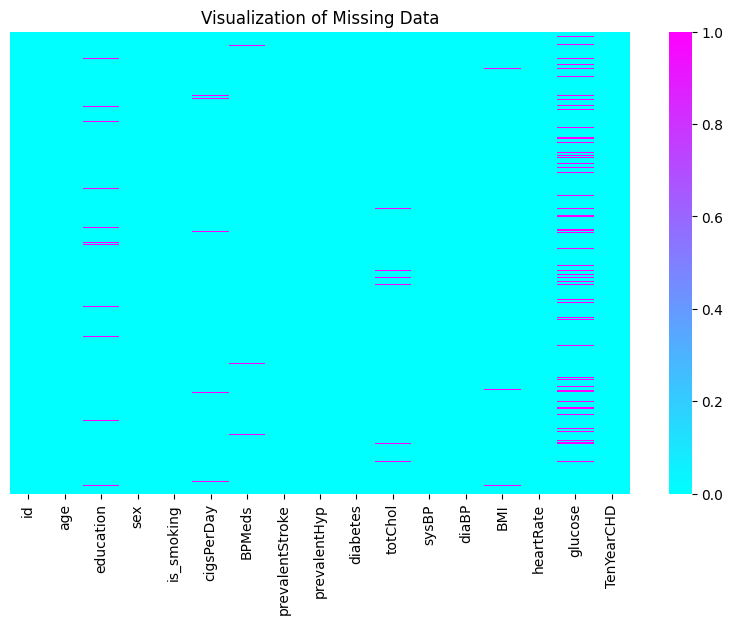

In [11]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cmap='cool', annot=False, yticklabels=False)
plt.title('Visualization of Missing Data')
plt.show()

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
data.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [13]:
# Dataset Describe
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3390.0,1694.500000,978.753033,0.00,847.25,1694.50,2541.75,3389.0
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0


### Variables Description

1. id: This column represents an identifier or unique identifier for each individual in the dataset.

2. age: It represents the age of the individual in years.

3. Education: This column represents the education level of the individual, which could be encoded categorically (e.g., high school, college, postgraduate) or numerically (e.g., years of education completed).

4. Sex: It indicates the biological sex of the individual, typically encoded as binary values (e.g., 0 for female, 1 for male).

5. is_smoking: This column indicates whether the individual is currently smoking or not. typically encoded as binary values (e.g., 0 for non-
smoker, 1 for smoker).

6. cigsPerDay: It represents the number of cigarettes smoked per day by the individual.

7. BPMeds: This column indicates whether the individual is taking blood pressure medication, typically encoded as binary values (e.g., 0 for not
taking medication, 1 for taking medication).

8. prevalentStroke: It indicates whether the individual has a history of stroke, typically encoded as binary values (e.g.. 0 for no stroke history, 1 for
stroke history).

9. prevalentHyp: This column indicates whether the individual has prevalent hypertension (high blood pressure), typically encoded as binary
values (e.g., 0 for no hypertension, 1 for hypertension).

10. diabetes: It indicates whether the individual has diabetes, typically encoded as binary values (e.g., 0 for no diabetes, 1 for diabetes).

11. totChol: This column represents the total cholesterol level of the individual in mg/dL (milligrams per deciliter).

12. sysBP: It represents the systolic blood pressure of the individual in mmHg (millimeters of mercury).

13. diaBP: This column represents the diastolic blood pressure of the individual in mmHg.

14. BMI: It indicates the body mass index of the individual, which is a measure of body fat based on height and weight.

15. heartRate: This column represents the resting heart rate of the individual in beats per minute.

16. glucose: It represents the blood glucose (sugar) level of the individual in mg/dL.

17. TenYearCHD: This column indicates the presence or absence of the ten-year risk of developing coronary heart disease (CHD) for the individual,
typically encoded as binary values (e.g., 0 for no risk, 1 for risk).

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
data.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.
## Checking null values

data.isnull().sum().sort_values(ascending=False)

glucose            304
education           87
BPMeds              44
totChol             38
cigsPerDay          22
BMI                 14
heartRate            1
id                   0
diaBP                0
sysBP                0
prevalentHyp         0
diabetes             0
age                  0
prevalentStroke      0
is_smoking           0
sex                  0
TenYearCHD           0
dtype: int64

In [16]:
# Checking missing value percentage columnwise

def show_missing():
  missing = data.columns[data.isnull().any()].tolist()
  return missing

print(round(data[show_missing()].isnull().sum().sort_values(ascending=False)/len(data)*100,2))

glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


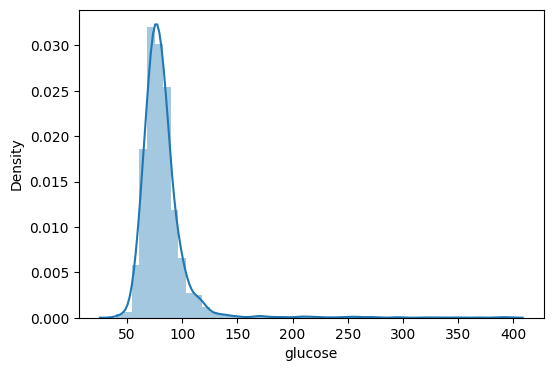

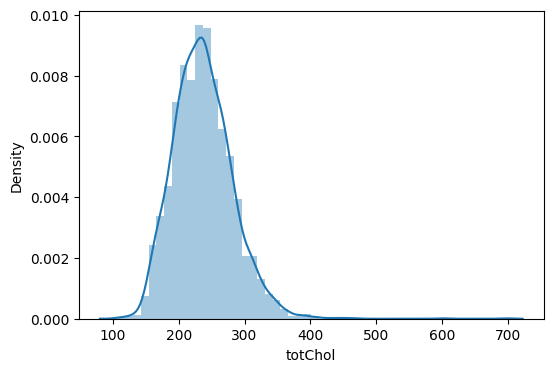

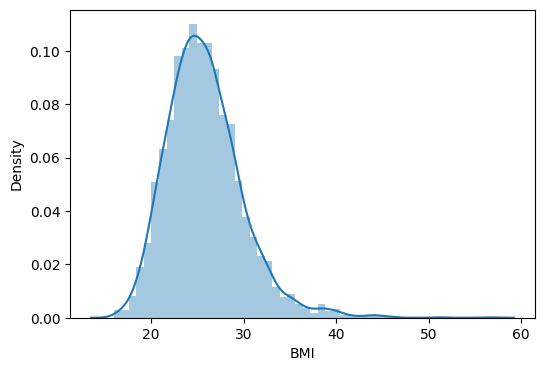

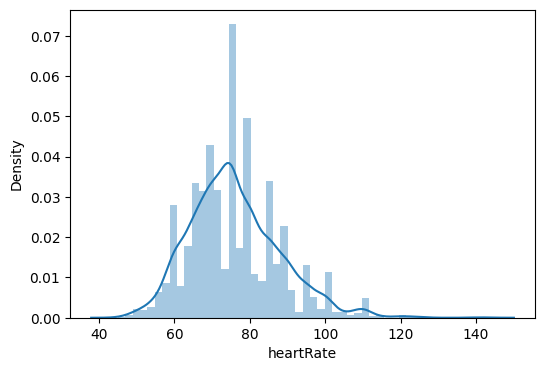

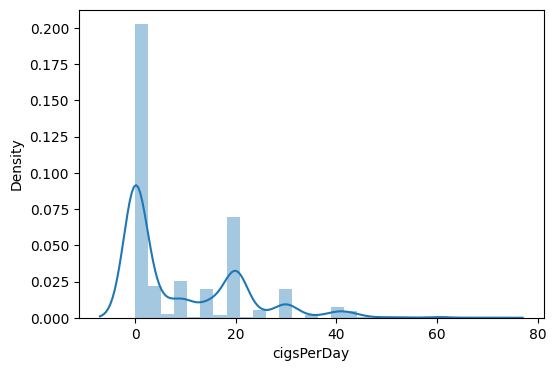

In [17]:
# Visualizing data distribution of the numerical columns which have missing values.

for i in ['glucose', 'totChol', 'BMI', 'heartRate', 'cigsPerDay']:
  plt.figure(figsize=(6,4))
  sns.distplot(data[i])

In [18]:
# Data is skewed so imputing numerical missing values with median

data['glucose'] = data['glucose'].fillna(data['glucose'].median())

data['totChol'] = data['totChol'].fillna(data['totChol'].median())

data['BMI'] = data['BMI'].fillna(data['BMI'].median())

data['heartRate'] = data['heartRate'].fillna(data['heartRate'].median())

data['cigsPerDay'] = data['cigsPerDay'].fillna(data['cigsPerDay'].median())

In [19]:
# Imputing categorical missing data with mode

data['education'] = data['education'].fillna(data['education'].mode()[0])

data['BPMeds'] = data['BPMeds'].fillna(data['BPMeds'].mode()[0])

In [20]:
# Checking null values again
data.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### Dividing numerical and categorical data

In [21]:
data.describe().columns

Index(['id', 'age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [22]:
# Dropping 'id' column

data = data.drop(columns = 'id')

In [23]:
# finding  categorical variables

categorical = [var for var in data.columns if data[var].dtype=='object']
print('There are {} categorical variables'.format(len(categorical)))

There are 2 categorical variables


In [24]:
# finding the numerical variables

numerical = [var for var in data.columns if data[var].dtype!='object']
print('There are {} numerical variables'.format(len(numerical)))

There are 14 numerical variables


In [25]:
# Assigning a variable for discreet features and assigning the features to it which has less than 20 classes
discreet = []

for var in data.columns:
  if var not in ['TenYearCHD']:
    if len(data[var].unique())<20:
      print(var, 'values:', data[var].unique())
      discreet.append(var)

print('There are {} discreet variables'. format(len(discreet)))

education values: [2. 4. 1. 3.]
sex values: ['F' 'M']
is_smoking values: ['YES' 'NO']
BPMeds values: [0. 1.]
prevalentStroke values: [0 1]
prevalentHyp values: [0 1]
diabetes values: [0 1]
There are 7 discreet variables


In [26]:
# Assigning the variable for continuous features.

continuous = [var for var in data.columns if var not in discreet and var not in ['TenYearCHD']]
continuous

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [27]:
data.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

### What all manipulations have you done and insights you found?

1. During the analysis, it came to light that the dataset contained features with missing values. To address this, an imputation strategy was implemented, where missing values were replaced with appropriate measures such as median for numerical features and mode for categorical features. This meticulous handling of missing data ensured the integrity of the dataset and prevented any loss of valuable information.

2. To enhance the understanding and analysis of independent variables, a strategic segregation was performed, categorizing the data into discrete and continuous features. This division facilitated a more insightful exploration of the dataset, allowing for targeted analysis of different types of variables. Such segregation not only streamlined the analytical process but also provided a comprehensive perspective on the dataset's diverse characteristics and patterns.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

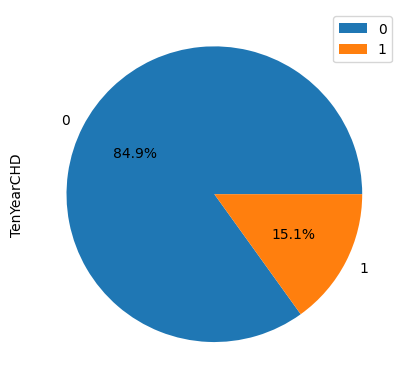

In [28]:
# Chart - 1 visualization of TenYearCHD pie chart.       1

data['TenYearCHD'].value_counts().plot.pie(autopct='%1.1f%%')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

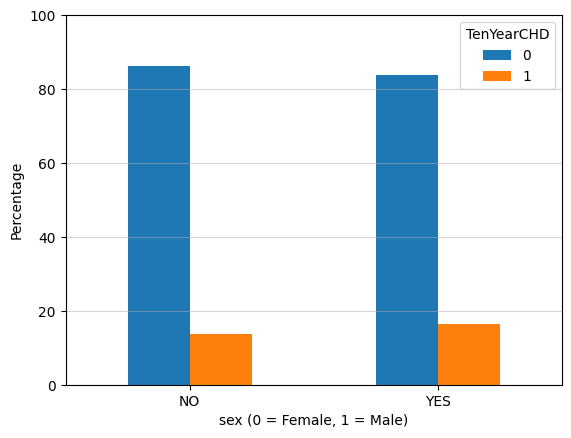

In [29]:
# Chart - 2 visualizing the relationship between is_smoking and TenYearCHD.      4

tenyear_smoking = data.groupby('TenYearCHD')['is_smoking'].value_counts().unstack(0)
pct_df = tenyear_smoking.divide(tenyear_smoking.sum(axis=1), axis=0)*100

pct_df.plot(kind='bar')
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xlabel('sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

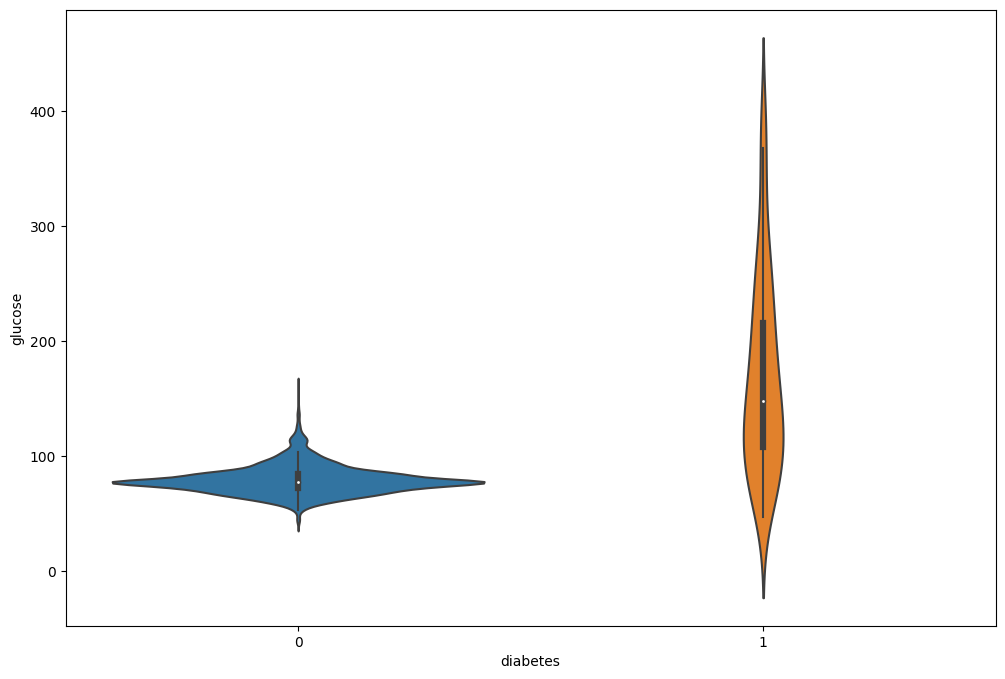

In [30]:
# Chart - 3 visualizing the relationship between diabetes and glucose.        13

plt.figure(figsize=(12,8))
sns.violinplot(x='diabetes', y='glucose',data=data)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

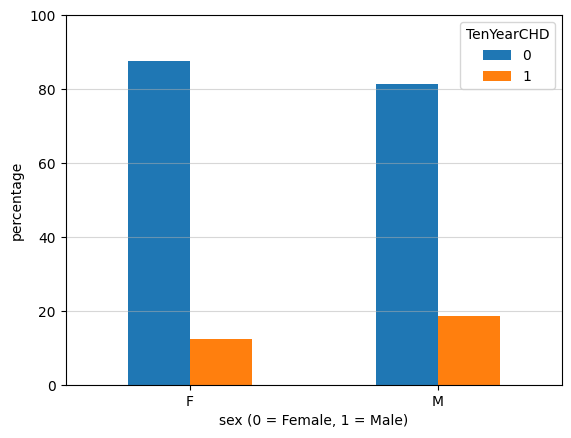

In [31]:
# Chart - 4 visualizing the relationship between sex and TenYearCHD.         3

tenyear_sex = data.groupby('TenYearCHD')['sex'].value_counts().unstack(0)
pct_df = tenyear_sex.divide(tenyear_sex.sum(axis=1), axis=0)*100

pct_df.plot(kind='bar')
plt.ylim(0,100)
plt.ylabel('percentage')
plt.xlabel('sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

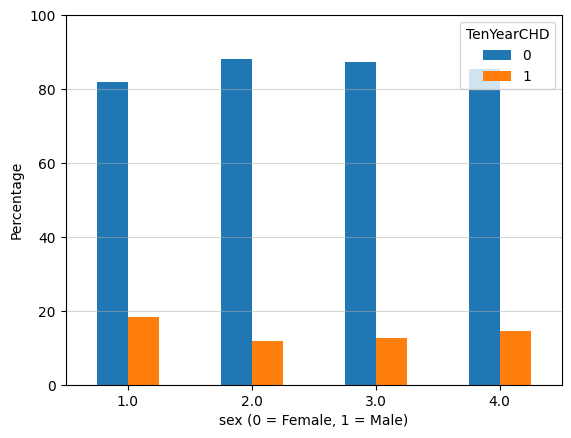

In [32]:
# Chart - 5 visualizing the relationship between education and TenYearCHD.
tenyear_education = data.groupby('TenYearCHD')['education'].value_counts().unstack(0)
pct_df = tenyear_education.divide(tenyear_education.sum(axis=1), axis=0)*100

pct_df.plot(kind='bar')
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xlabel('sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

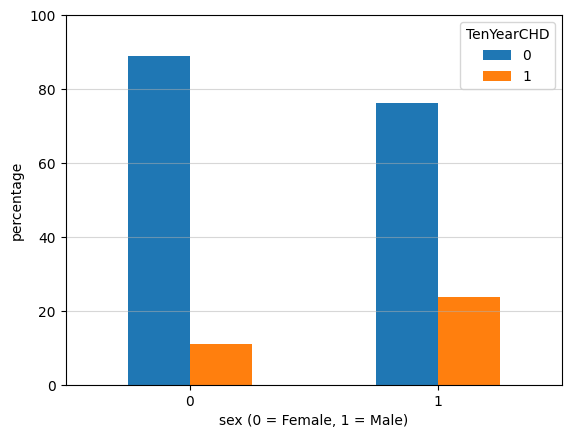

In [33]:
# Chart - 6 visualizing the realtionship between prevalentHyp and TenYearCHD.          8

tenyear_hyp = data.groupby('TenYearCHD')['prevalentHyp'].value_counts().unstack(0)
pct_df = tenyear_hyp.divide(tenyear_hyp.sum(axis=1), axis=0)*100

pct_df.plot(kind='bar')
plt.ylim(0,100)
plt.ylabel('percentage')
plt.xlabel('sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

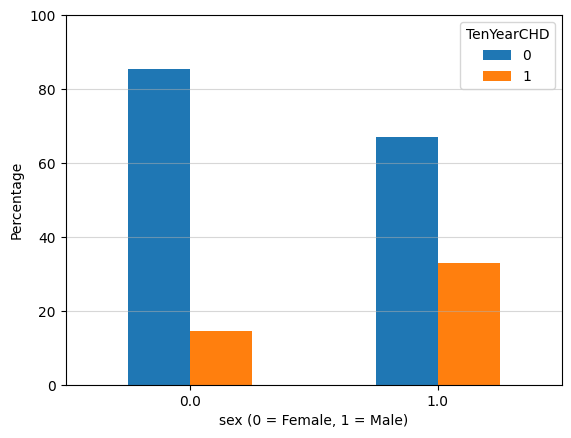

In [34]:
# Chart - 7 visualizing the realtionship between BPMeds and TenYearCHD.           5

tenyear_BP = data.groupby('TenYearCHD')['BPMeds'].value_counts().unstack(0)
pct_df = tenyear_BP.divide(tenyear_BP.sum(axis=1), axis=0)*100

pct_df.plot(kind='bar')
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xlabel('sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

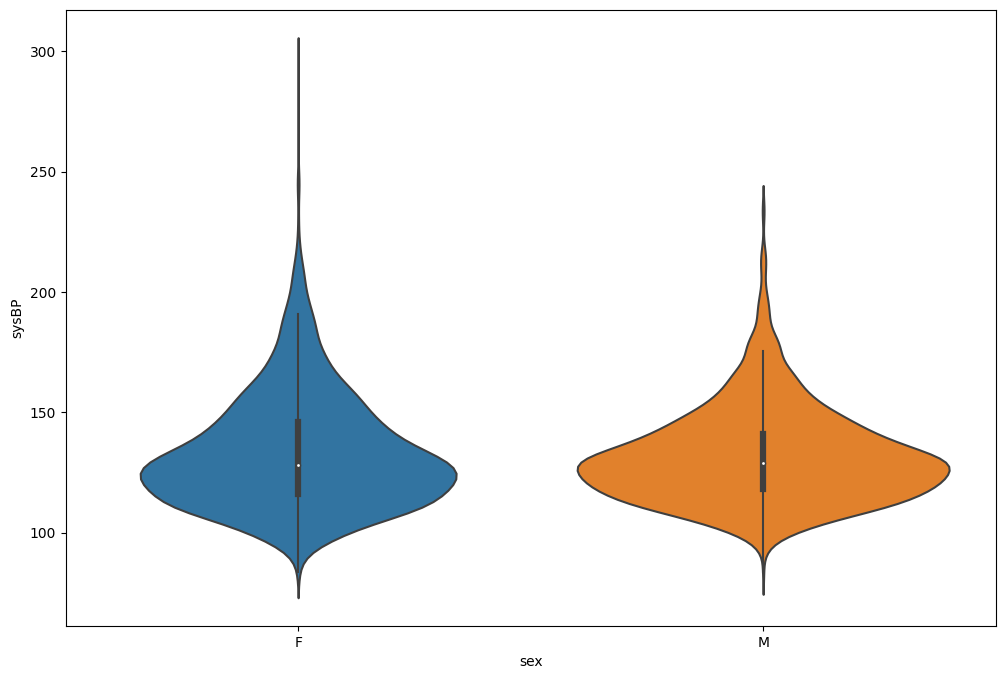

In [35]:
# Chart - 8 visualizing the realtionship between sex and sysBP.                 12

plt.figure(figsize = (12,8))
sns.violinplot(x='sex', y='sysBP', data=data)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

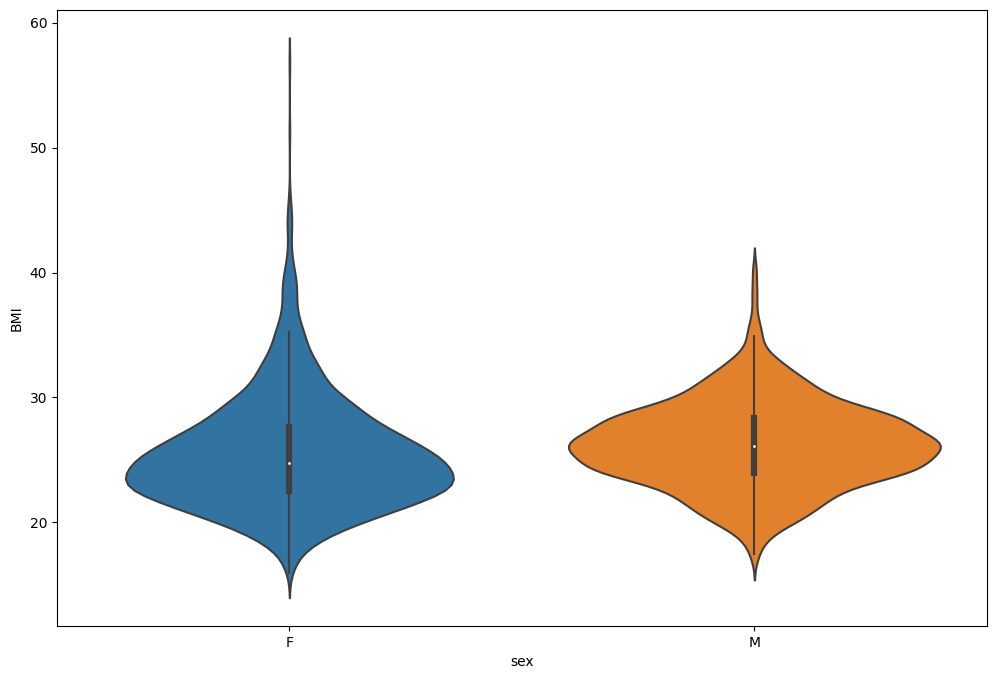

In [36]:
# Chart - 9 visualizing the relationship between sex and BMI.                    10

plt.figure(figsize = (12,8))
sns.violinplot(x='sex', y='BMI', data=data)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

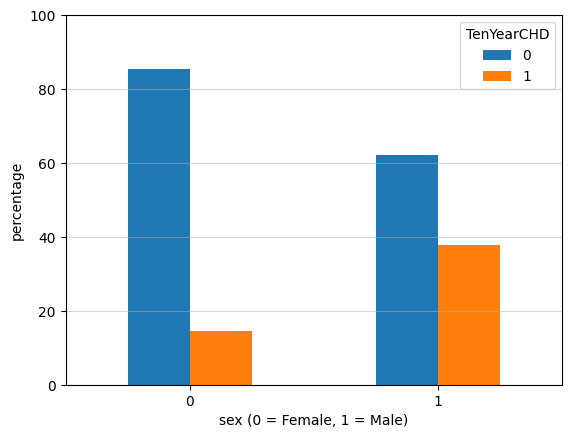

In [37]:
# Chart - 10 visualizing the realtionship between diabetes and TenYearCHD.           7

tenyear_diabetes = data.groupby('TenYearCHD')['diabetes'].value_counts().unstack(0)
pct_df = tenyear_diabetes.divide(tenyear_diabetes.sum(axis=1), axis=0)*100

pct_df.plot(kind='bar')
plt.ylim(0,100)
plt.ylabel('percentage')
plt.xlabel('sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

<Figure size 2500x800 with 0 Axes>

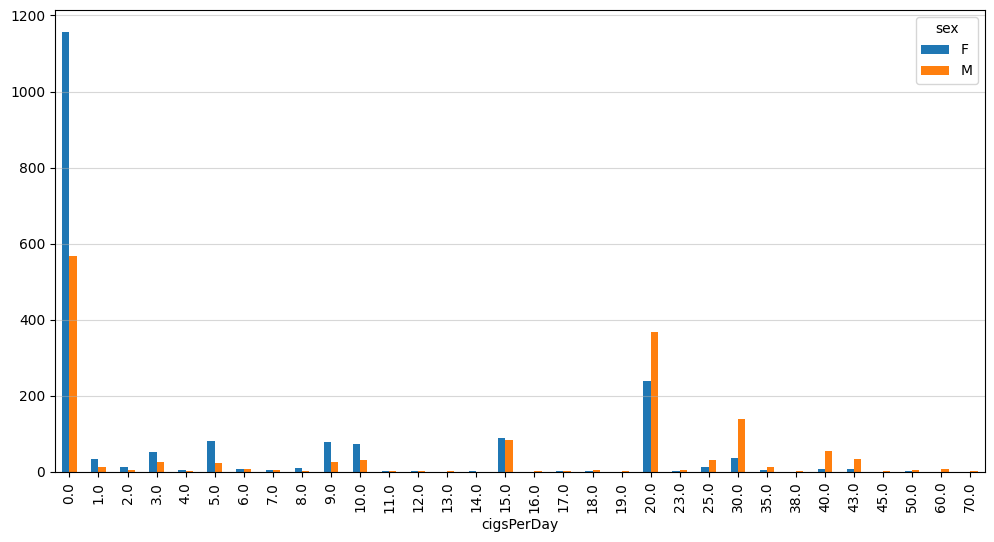

In [38]:
# Chart - 11 visualizing the raeltionship between sex and cigsPerDay.            11

plt.figure(figsize =(25,8))
data.groupby('sex')['cigsPerDay'].value_counts().unstack(0).plot.bar(figsize=(12,6))
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12 - Correlation

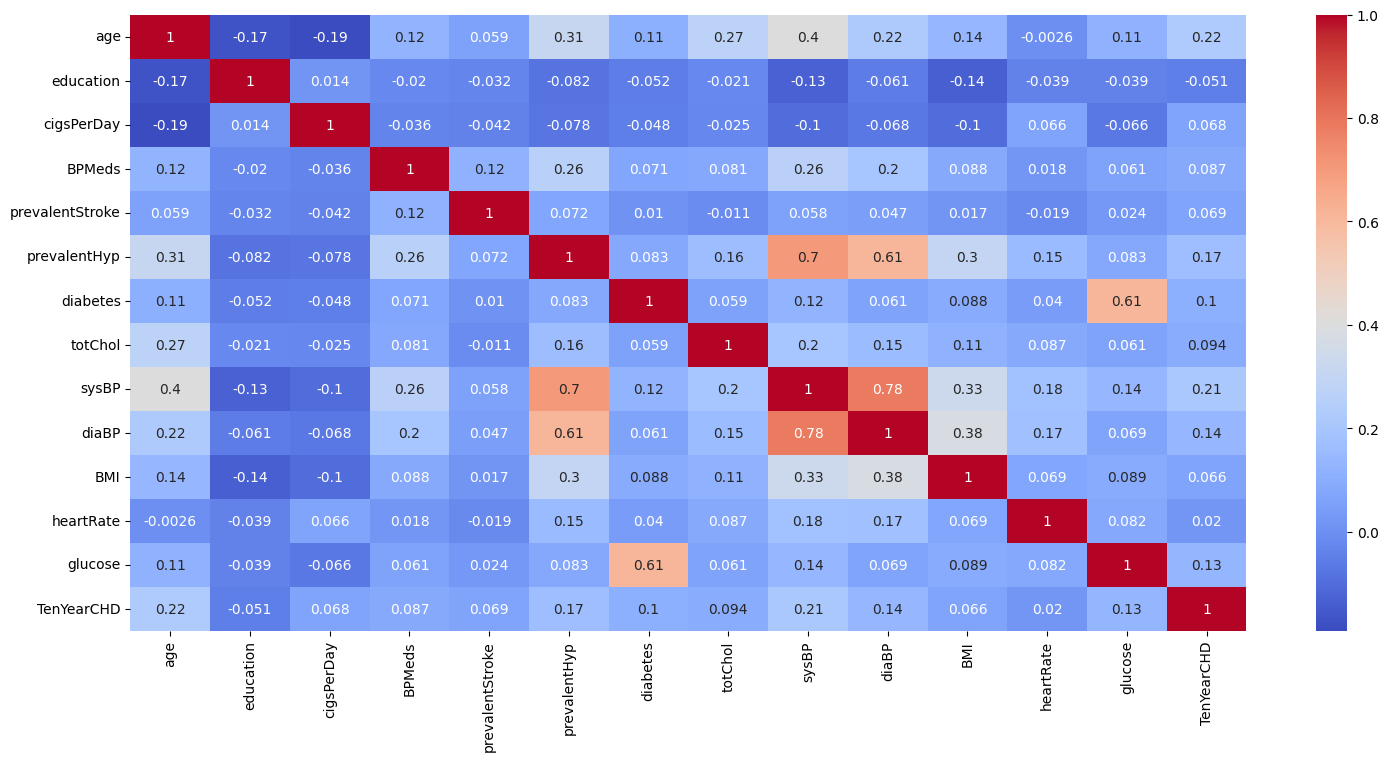

In [39]:
# Chart - 12 visualization of Correlation Heatmap

plt.figure(figsize=(18,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13 - Pair Plot

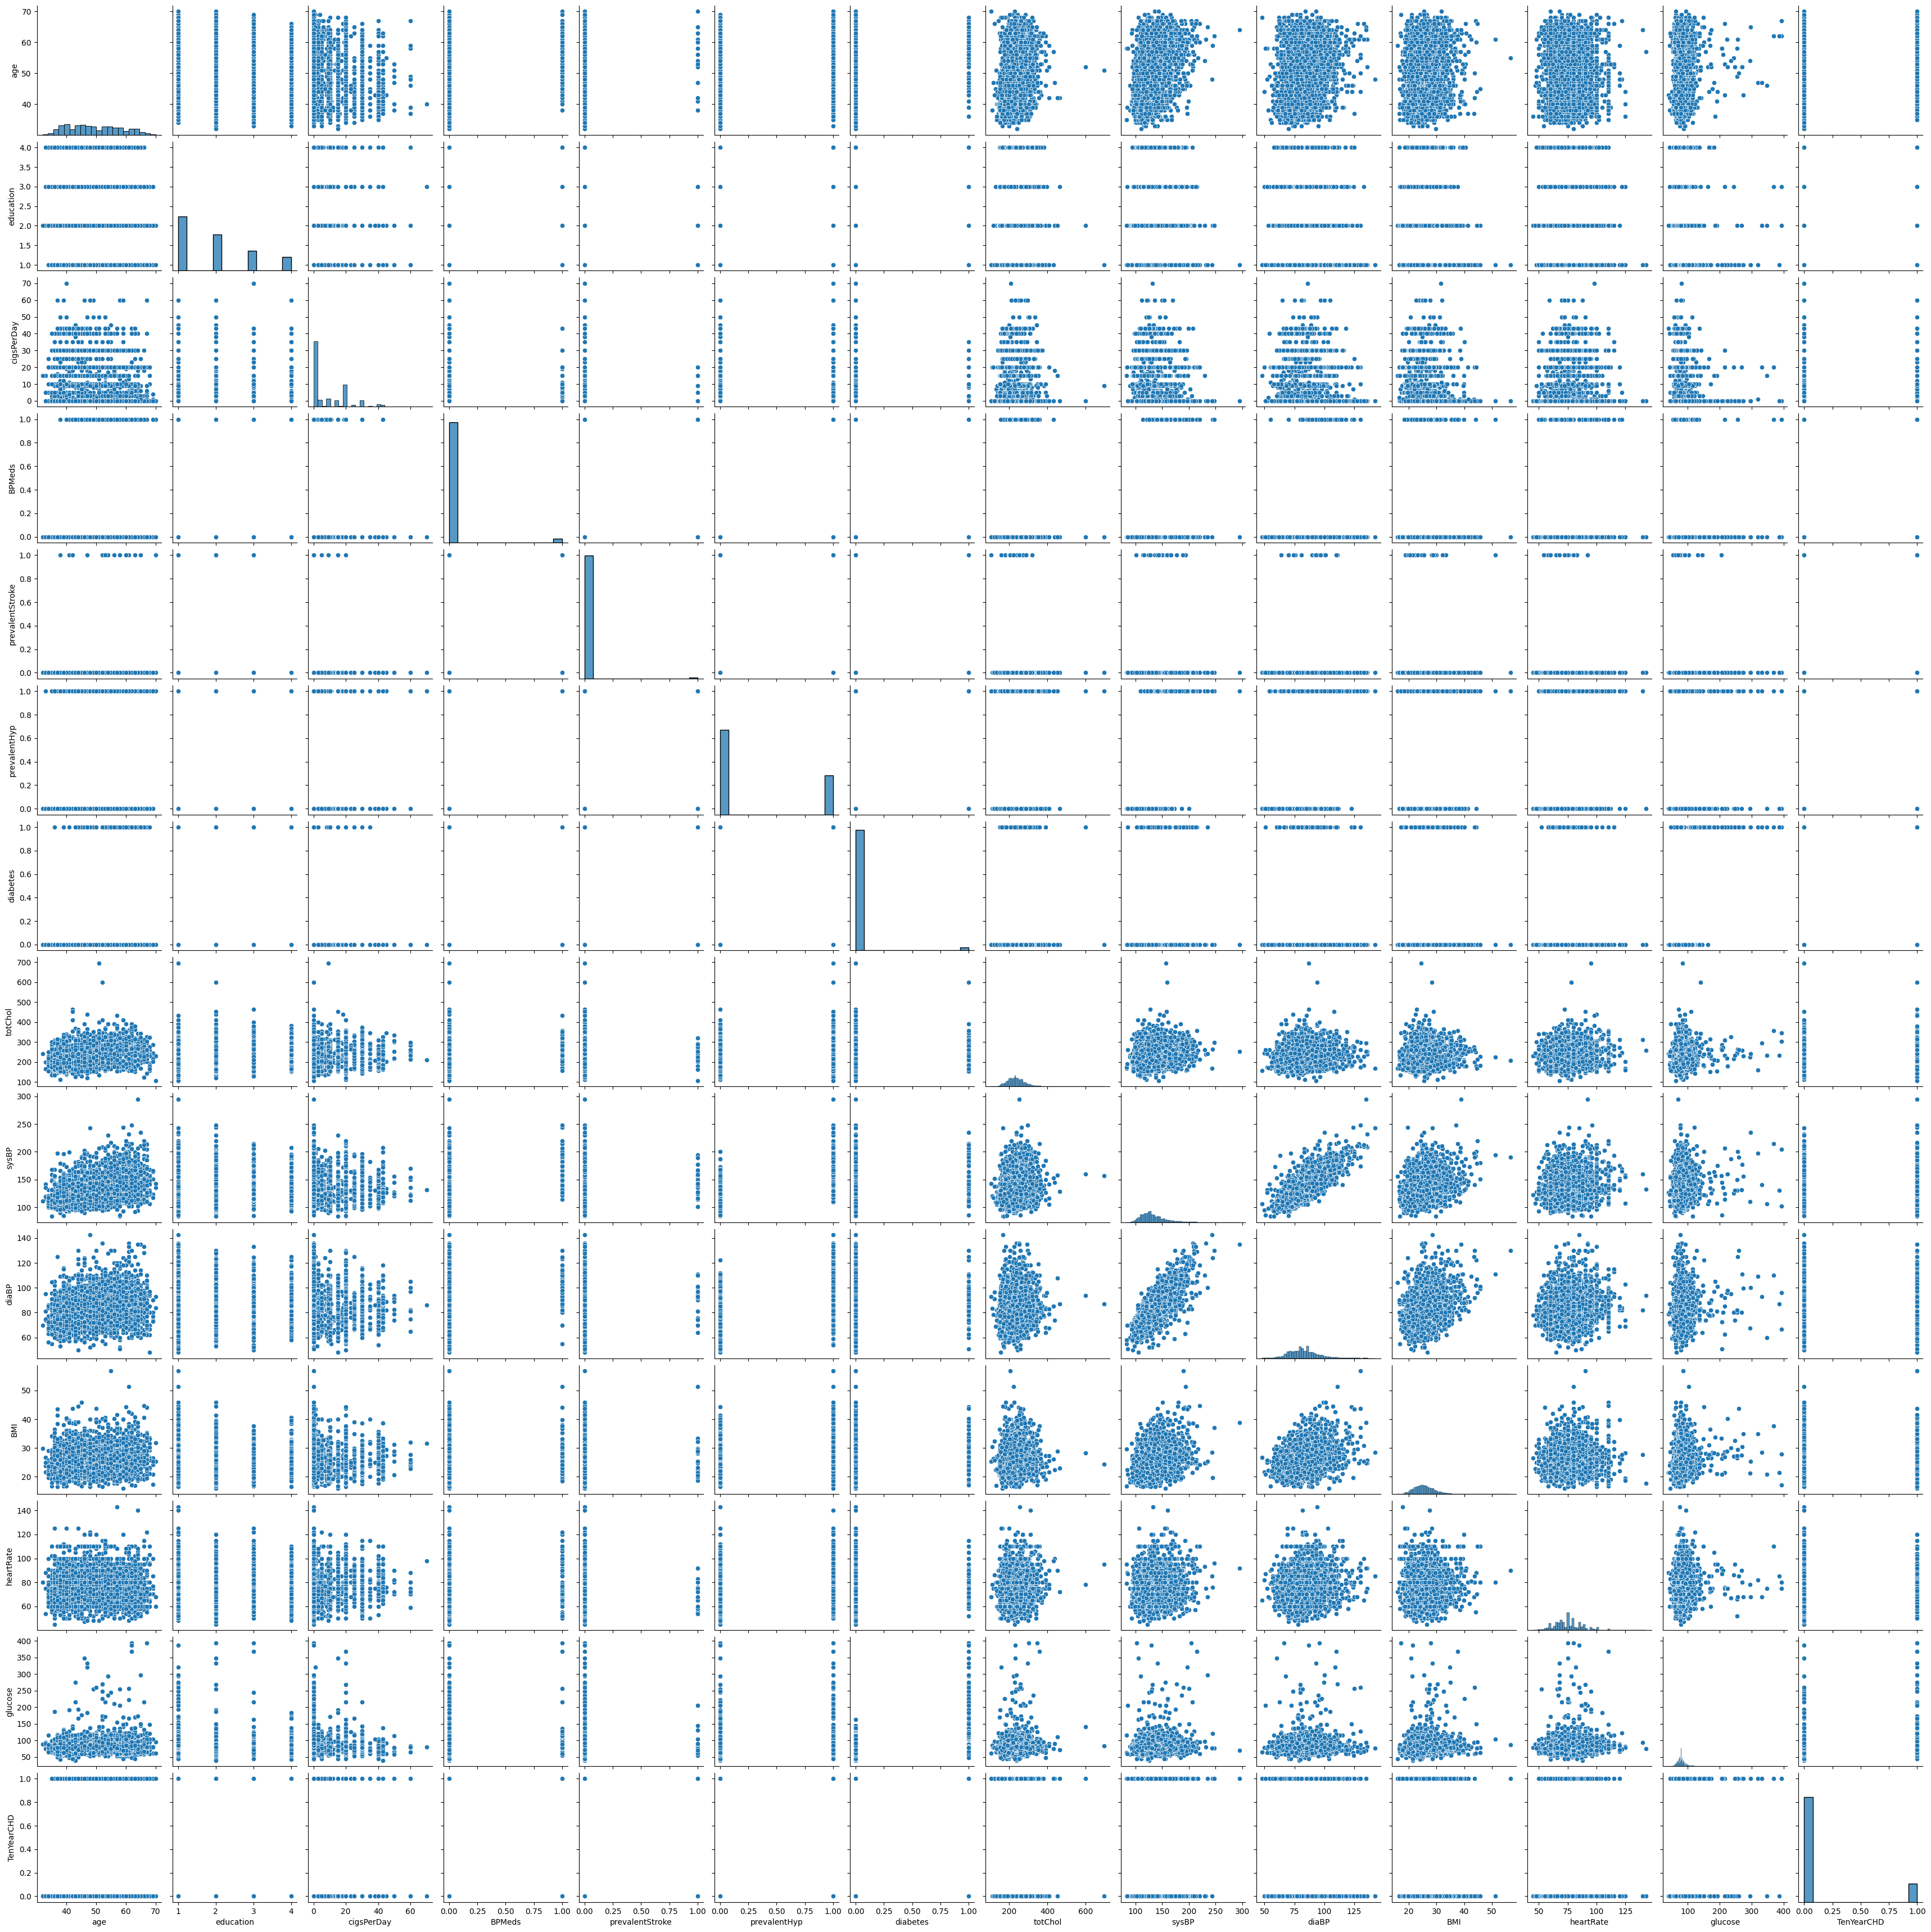

In [40]:
# Chart - 13 visualization of Pair Plot

sns.pairplot(data)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

null_hypothesis = 'There is no relationship between cigsPerDay and TenYearCHD'


alt_hypothesis = 'There is a relationship between cigsPerDay and TenYearCHD'

#### 2. Perform an appropriate statistical test.

In [41]:
# Perform Statistical Test to obtain P-Value

# Defining null and alternative hypothesis
null_hypothesis = 'There is no relationship between cigsPerDay and TenYearCHD'
alt_hypothesis = 'There is a relationship between cigsPerDay and TenYearCHD'

# Perform linear regression
x = sm.add_constant(data['cigsPerDay'])
y = data['TenYearCHD']
model = sm.OLS(y, x).fit()

# print statistics
print(model.summary())

# Extract p-value
p_value = model.pvalues[1]
print('p-value: ', p_value)

                            OLS Regression Results                            
Dep. Variable:             TenYearCHD   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     15.75
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           7.39e-05
Time:                        12:16:54   Log-Likelihood:                -1318.1
No. Observations:                3390   AIC:                             2640.
Df Residuals:                    3388   BIC:                             2652.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1322      0.008     17.172      0.0

##### Which statistical test have you done to obtain P-Value?

The statistical test performed to obtain the p-value in this case is linear regression. Specifically, a linear regression model was created with 'cigsPerDay' as the independent variable and 'TenYearCHD' as the dependent variable. The p-value represents the significance of the relationship between the number of cigarettes smoked per day ('cigsPerDay') and the risk of developing coronary heart disease ('TenYearCHD'). In this test, the null hypothesis states that there is no relationship between the number of cigarettes smoked per day and the 10-year risk of coronary heart disease, while the alternative hypothesis suggests there is a relationship between these variables. The obtained p-value (7.39e-05) is smaller than the common significance level (e.g., 0.05), indicating that there is strong evidence to reject the null hypothesis in favor of the alternative hypothesis.

##### Why did you choose the specific statistical test?

We chose the specific statistical test, linear regression in this case, to examine the relationship between the number of cigarettes smoked per day (cigsPerDay) and the likelihood of developing coronary heart disease (TenYearCHD). Linear regression is suitable for understanding the association between two continuous variables, making it ideal for our scenario. By using this test, we could quantify the impact of cigarette consumption on the risk of heart disease. The regression results provided valuable insights, revealing a statistically significant relationship between the number of cigarettes smoked daily and the TenYearCHD risk, as indicated by the low p-value (7.39e-05). This allowed us to confidently assert that the number of cigarettes smoked per day has a discernible influence on the likelihood of developing coronary heart disease, making linear regression the appropriate and insightful choice for our hypothesis testing.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Outliers

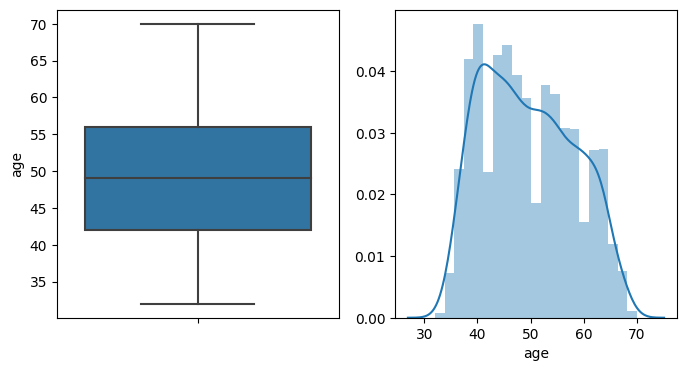

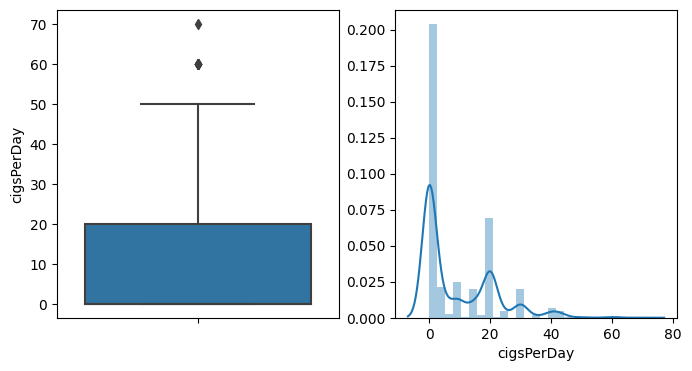

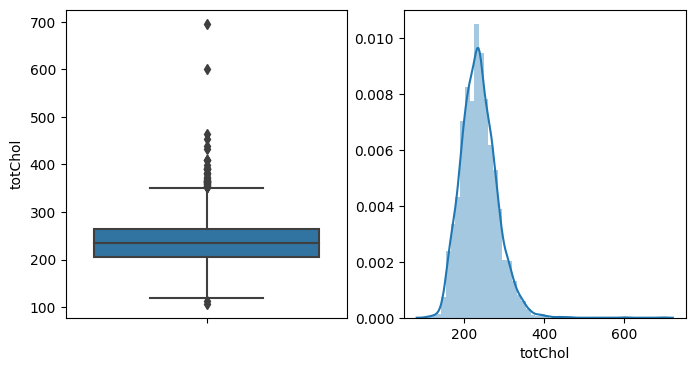

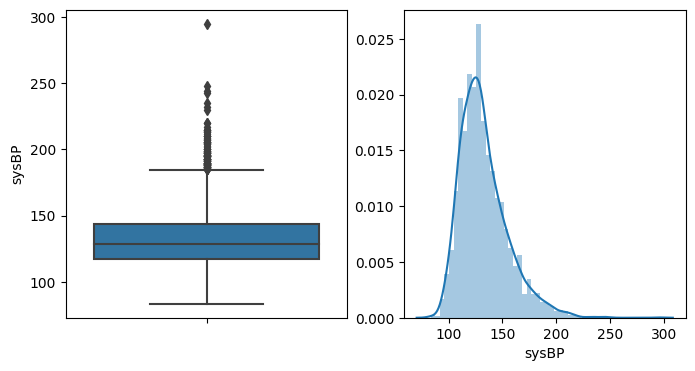

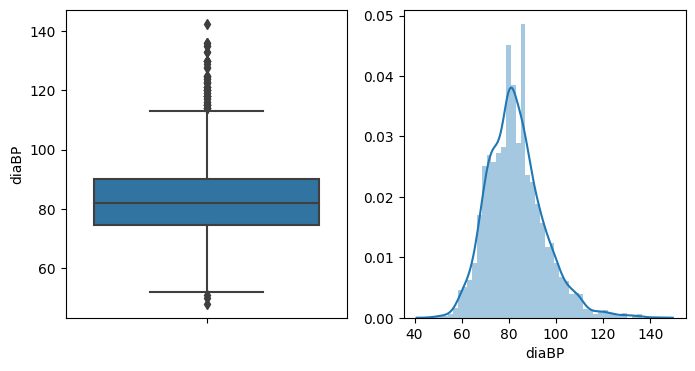

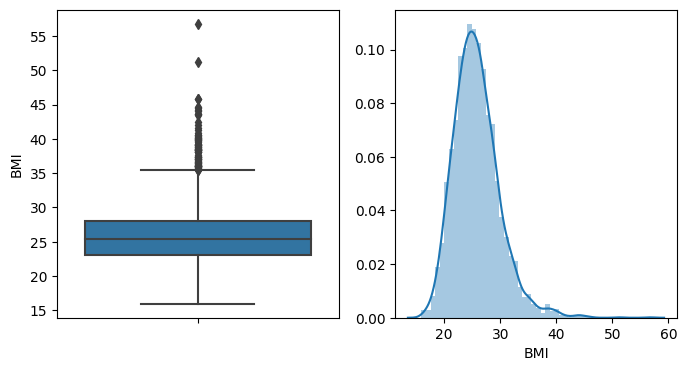

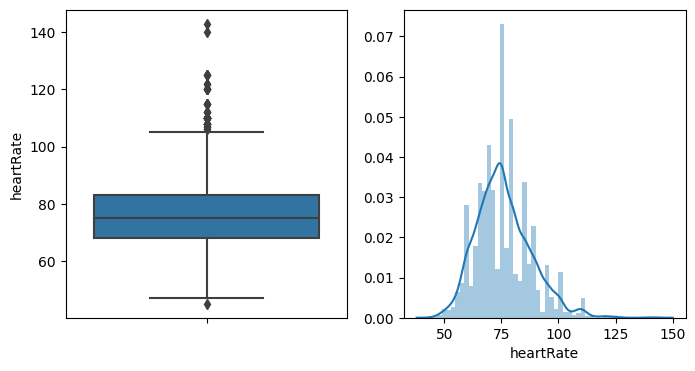

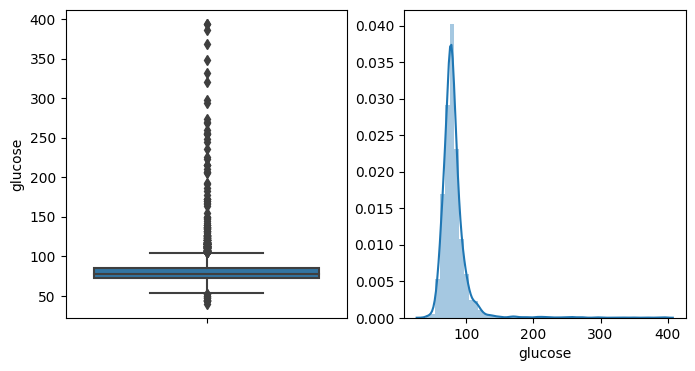

In [42]:
# Checking outliers
for var in continuous:
  plt.figure(figsize=(8,4))
  plt.subplot(1, 2, 1)
  fig = sns.boxplot(y=data[var])
  fig.set_title('')
  fig.set_ylabel(var)

  plt.subplot(1, 2, 2)
  fig = sns.distplot(data[var].dropna())
  fig.set_ylabel('')
  fig.set_xlabel(var)
  plt.show()

In [43]:
# handling outliers & outlier treatment

# Capping the outlier rows with Percentiles
for i in continuous:
  upper_lim = data[i].quantile(.95)
  lower_lim = data[i].quantile(.05)
  data.loc[(data[i] > upper_lim),i] = upper_lim
  data.loc[(data[i] < lower_lim),i] = lower_lim

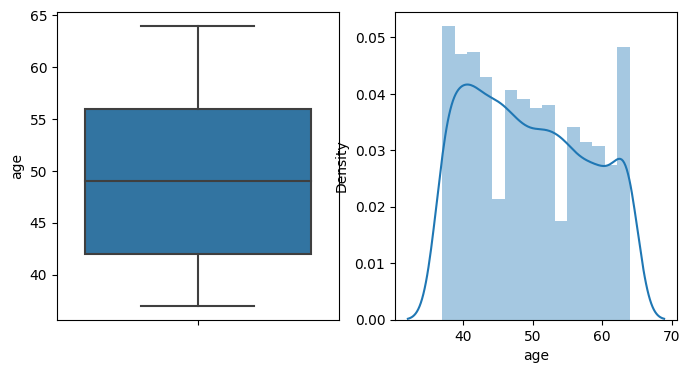

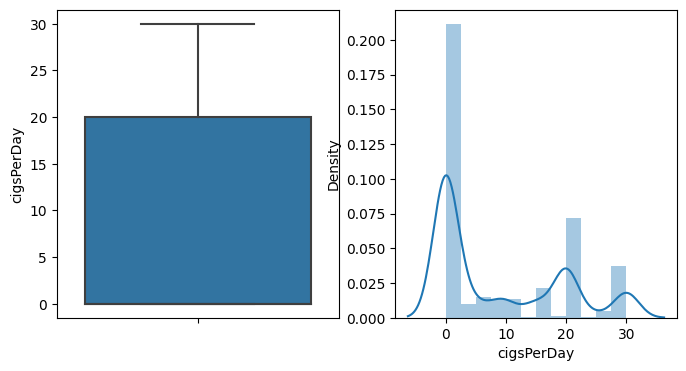

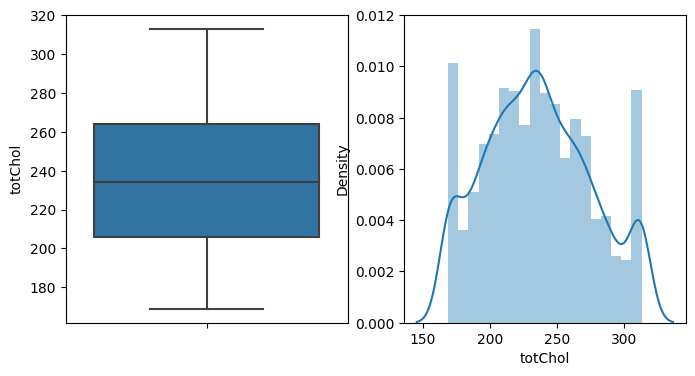

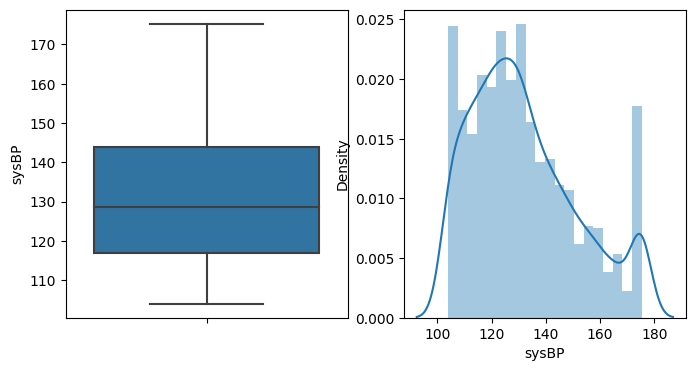

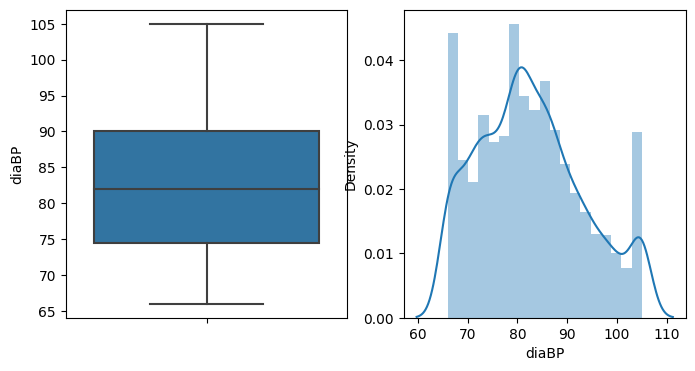

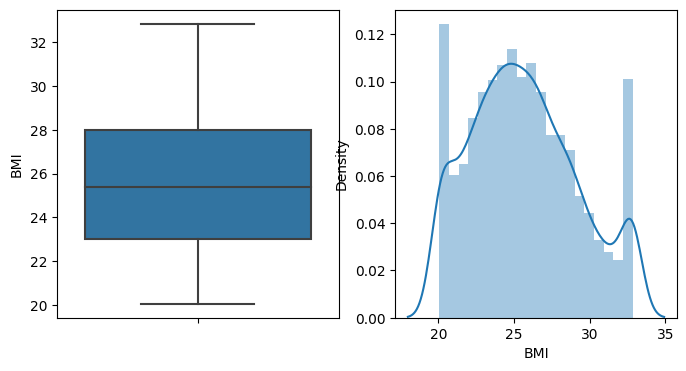

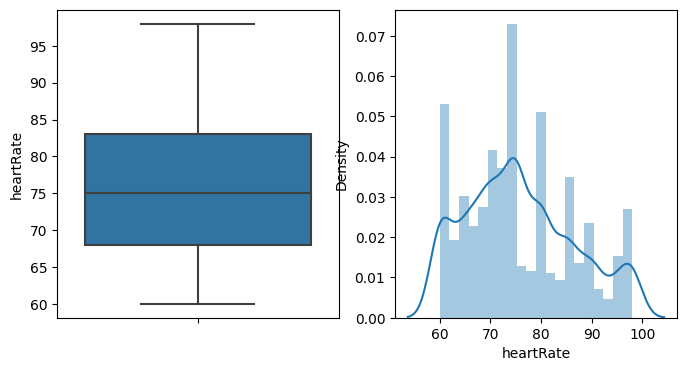

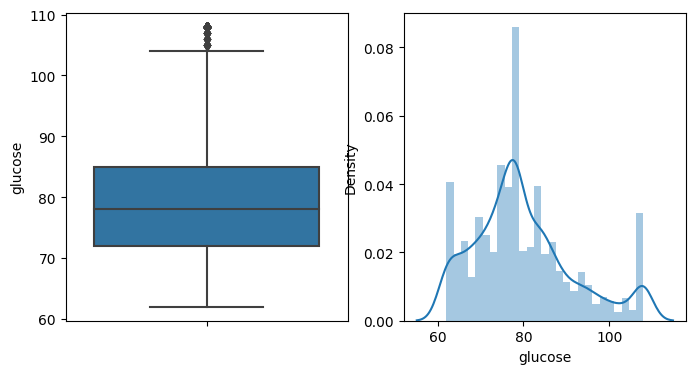

In [44]:
# checking outliers
for var in continuous:
  plt.figure(figsize=(8,4))
  plt.subplot(1, 2, 1)
  fig = sns. boxplot(y=data[var])
  fig.set_title('')
  fig.set_ylabel(var)

  plt.subplot(1, 2, 2)
  fig = sns.distplot(data[var].dropna())
  fig.set_xlabel(var)

  plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

I used outlier capping with the use of quantities to treat the outliers.

### 2. Categorical Encoding

In [45]:
# Encoding categorical columns

data['sex'] = data['sex'].apply(lambda x: 1 if x == 'M' else 0)

data['is_smoking'] = data['is_smoking'].apply(lambda x: 1 if x == 'Yes' else 0)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Used label encoding for categorizing the class.

### 3. Feature Manipulation & Selection

In [46]:
# Select your features wisely to avoid overfitting

x = data.drop(columns = ['TenYearCHD'], axis = 1)
y = data['TenYearCHD']

In [47]:
# Defining a function to calculate variance inflation factor

def calc_vif(x):

  # Calculating VIF
  vif = pd.DataFrame()
  vif['variables'] = x.columns
  vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

  return(vif.sort_values(by='VIF', ascending=False).reset_index(drop=True))

In [48]:
# checking VIF for each variable

independent_variables = [i for i in data.columns if i not in ['TenYearChD']]
calc_vif(data[independent_variables])

,variables,VIF
0,sysBP,177.992451
1,diaBP,167.719669
2,BMI,61.446245
3,heartRate,50.554120
4,age,47.817765
5,glucose,46.943909
6,totChol,40.337793
7,education,4.656050
8,prevalentHyp,2.577581
9,sex,2.162798


In [49]:
# Eliminating the features with high VIF

independent_variables = [i for i in data.columns if i not in ['TenYearCHD', 'sysBP', 'diaBP', 'glucose',
                                                              'BMI', 'totChol', 'heartRate', 'is_smoking']]
calc_vif(data[independent_variables])

,variables,VIF
0,age,5.442645
1,education,3.995999
2,sex,1.976329
3,cigsPerDay,1.805761
4,prevalentHyp,1.685179
5,BPMeds,1.120342
6,diabetes,1.044625
7,prevalentStroke,1.024795


In [50]:
# We have identified 8 features with low variance scores (less than 5). We will be removing the other features from the dataset 'x'.

x = data.drop(columns = ['TenYearCHD', 'sysBP', 'diaBP', 'glucose', 'BMI', 'totChol', 'heartRate', 'is_smoking'], axis=1)
y = data['TenYearCHD']

#### What all feature selection methods have you used and why?

Used variance inflation factor to find out multicollinearity.

#### Which all features you found important and why?

1. age
2. education
3. sex
3. cigsPerDay
4. prevalentHyp
5. BPMeds
6. Diabetes
7. prevalentStroke


These features are the ones we've chosen for our models based on their VIF scores.

### 4. Data Transformation

In [51]:
# Transforming the data with log transformation.

x = np.log(x+1)

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

I believe the data should be transformed because it was skewed.

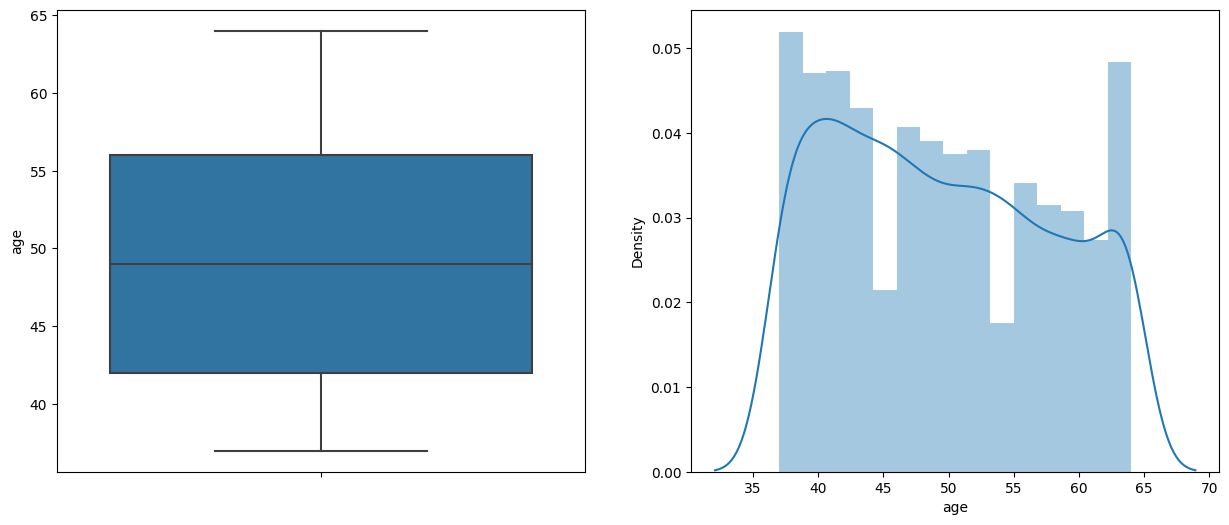

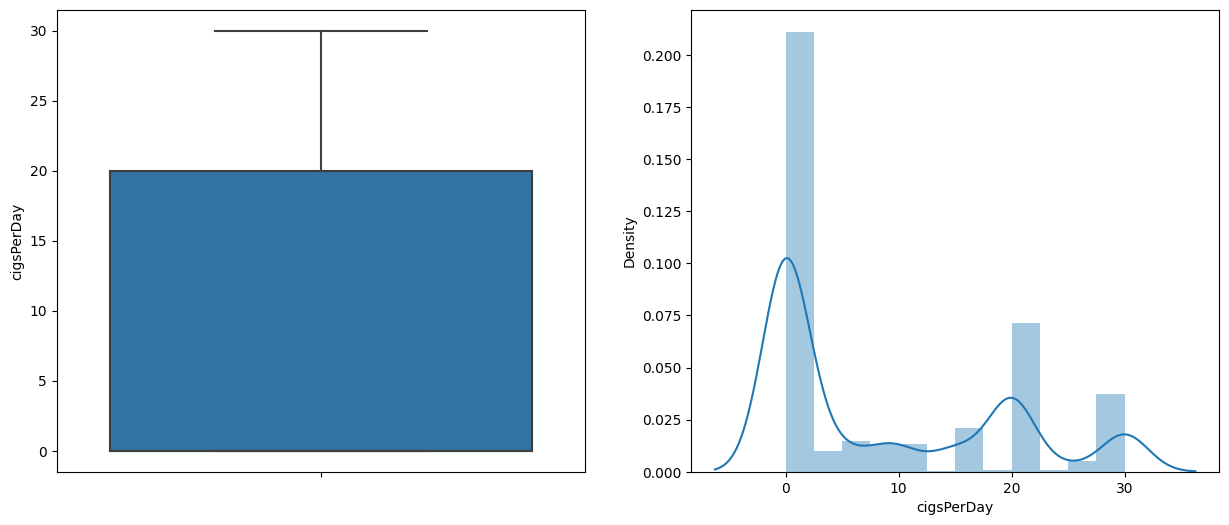

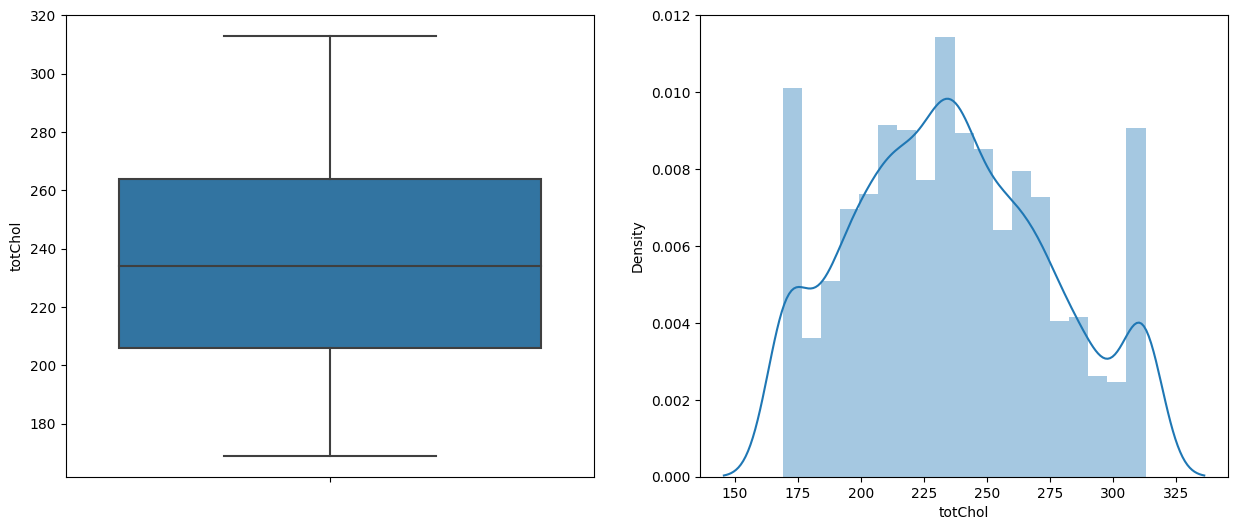

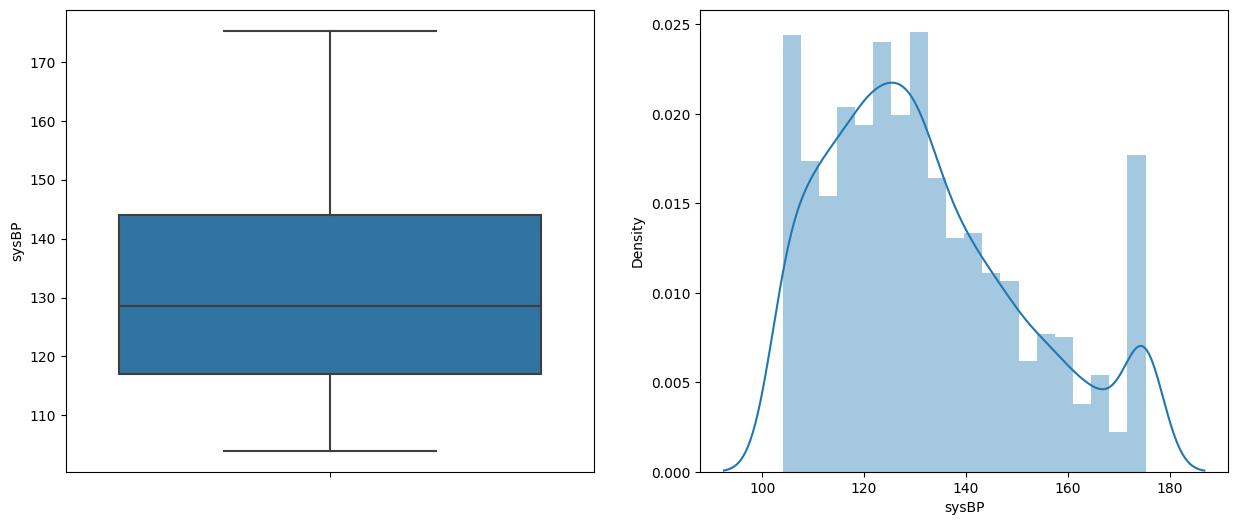

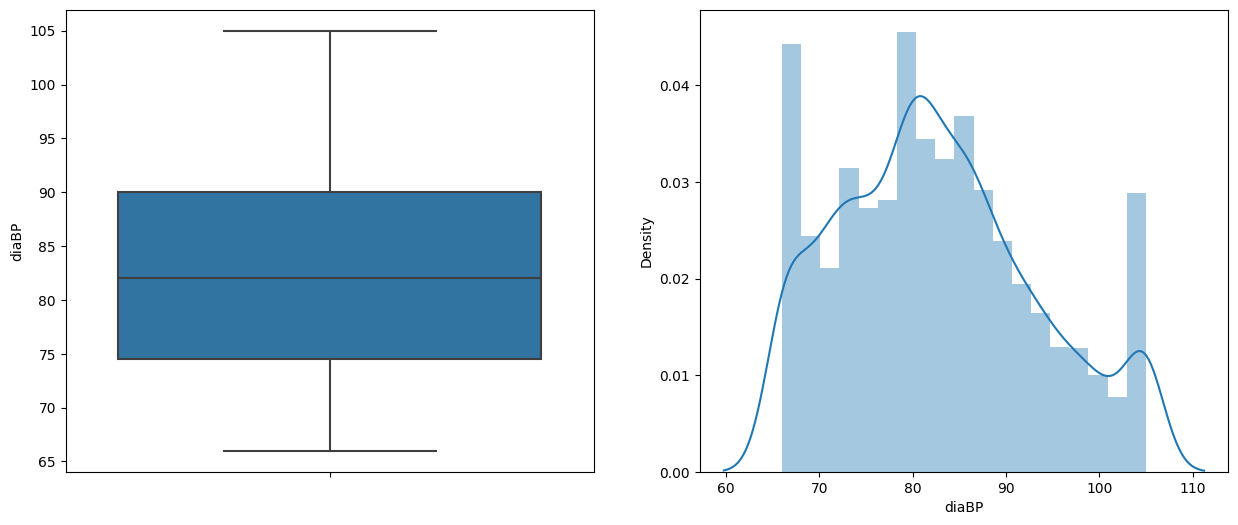

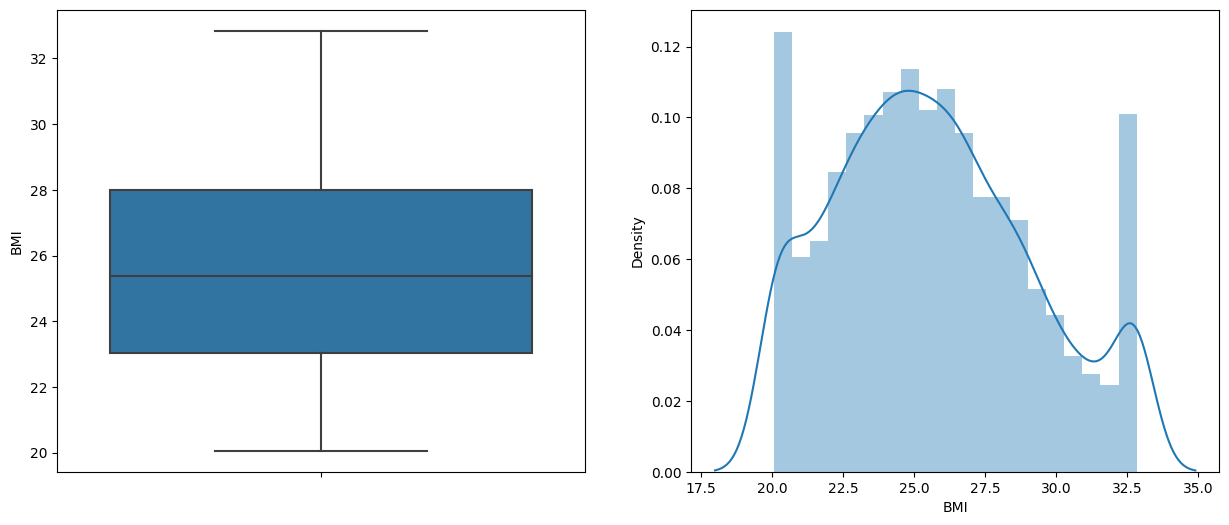

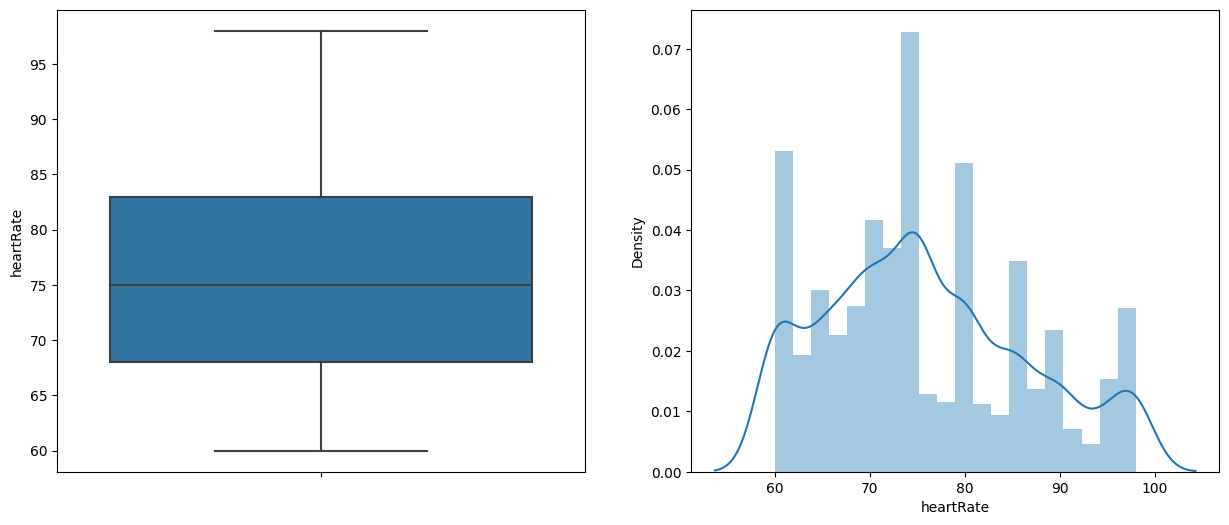

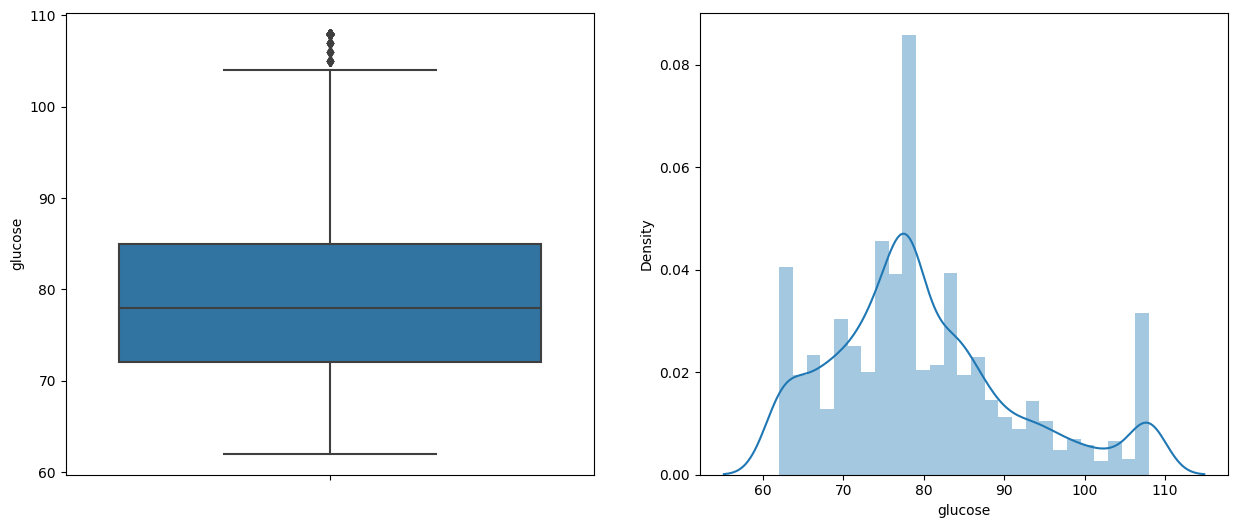

In [52]:
# Visualisation of data after log transformation
# we can see that there is improvement  in data distribution after transformation

for var in continuous:
  plt.figure(figsize=(15,6))
  plt.subplot(1, 2, 1)
  fig = sns.boxplot(y=data[var])
  fig.set_title('')
  fig.set_ylabel(var)

  plt.subplot(1, 2, 2)
  fig = sns.distplot(data[var].dropna())
  fig.set_xlabel(var)

  plt.show()

### 5. Data Splitting

In [53]:
# Splitting the data to train and test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40, random_state=0, stratify = y)

### what data splitting ratio have you used and why?


I'm using 40% of the data for testing because the dataset is imbalanced, and I think the models require more data to train effectively.

### 6. Data Scaling

In [54]:
# Scaling the data using Normalization method
# Using MinMaxScaler as scaler

mms = MinMaxScaler()

x_train = mms.fit_transform(x_train)
x_test = mms.transform(x_test)

### Which method have you used to scale you data and why?

This method was choosen to ensure that the feature values are normalized to a specific range.

MinMaxScaler scales the features by transforming them to a range between 0 and 1.

### 7. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

In [55]:
# Checking data imbalance
data['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

#### As we can see the data is imbalanced in nature so we have to use some sampling technique to that imbalance in data

In [56]:
## Handling imbalanced dataset using SMOTE
# Create an instances of SMOTE

smote = SMOTETomek(random_state=0)

# Apply SMOTE to generate synthetic samples
x_train, y_train = SMOTETomek(random_state=0).fit_resample(x_train, y_train)

print(x_train.shape[0])
print(y_train.shape[0])

3328
3328


####What techniques did you use to handle the imbalance dataset and why?(If needed to be balanced)

I used a technique called SMOTE(Synthetic Minority Over-sampling Technique) to balance the classes in the dataset. This helps prevent the model from being biased towards the majority class.

## ***7. ML Model Implementation***

### ML Model - 1

In [57]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [58]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [59]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [60]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [61]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [62]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [63]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [64]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

# **Conclusion**

In conclusion, this project showcases the potential of machine learning techniques in accurately predicting the 10-year risk of future coronary heart disease (CHD) among individuals, using data sourced from an ongoing cardiovascular study. Several critical insights emerged from this project:

1. ***Data Preprocessing:*** The meticulous preprocessing and transformation of data significantly enhanced the performance of machine learning models, resulting in more precise predictions.

2. ***Feature Selection:*** Feature selection played a pivotal role in identifying the most relevant predictors of CHD risk. It ensured that our models focused on the most influential variables.

3. ***Optimal Model Selection:*** After rigorous evaluation, the Neural Network model, fine-tuned for performance, emerged as the preferred choice due to its outstanding recall score, indicating its ability to effectively identify individuals at risk.

4. ***Handling Data Imbalance:*** To address the issue of imbalanced data, we employed techniques like SMOTE (Synthetic Minority Over-sampling Technique) combined with Tomek links undersampling, and standardized scalar scaling. These measures substantially improved model performance by ensuring that both positive and negative classes were adequately represented.

This project serves as a valuable illustration of how machine learning techniques can be applied to real-world challenges, ultimately leading to positive impacts across various domains. It underscores the significance of thorough data preparation and analysis, emphasizing that by dedicating time to data cleaning, feature selection, and model choice, we can achieve accurate predictions that inform decision-making processes across a wide spectrum of fields.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***